# Ejercicio 1: Análisis preliminar de entrevistas

Eres parte de un grupo de investigación enfocado en la toma de decisiones vocacionales. El grupo acaba de recibir una transcripción de entrevistas para analizar. Antes de seguir la ruta tradicional de análisis cualitativo, te han solicitado que puedas explorar la información textual presente en las entrevistas. 

Primero, corresponde cargar la transcripción de entrevistas, provista en formato PDF. A continuación se presenta el funcionamiento básico de la librería PyPDF2:

In [2]:
# Instalar el paquete PyPDF2
!pip install PyPDF2
!pip install nltk

  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61085 sha256=d88b60b590bd0254be4e8c2251fe7bb5d868f156f28b3340b7a34e6a1b3345a2
  Stored in directory: c:\users\renat\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [1]:
# Importar paquetes a ser utilizados
import matplotlib.pyplot as plt
import PyPDF2
import nltk

# crea un objeto de archivo pdf
pdfFileObj = open('Anexo_Entrevistas.pdf', 'rb')
 
# crea un objeto de lectura de pdf
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
 
# muestra el número de páginas en un archivo pdf
print(pdfReader.numPages)
 
# crea un objeto de página
pageObj = pdfReader.getPage(2)
 
# extrae text de una página
print(pageObj.extractText())

92
1
 
 
1.
 
Entrevista 1
 
 
Estudiante 1 de género masculino, universidad pública, 
psicología
, que proviene de 
liceo
 
científico 

 
humanista A (entrevistado el 6 de enero de 2014).
 
 
 
Iniciando mi nombre es 
entrevistado uno
, tengo 20 años, estudio 
psicología
 
en la 
universidad pública
, estoy, pasé a tercer año de la carrera y egresé, la enseñanza media la 
cursé en el liceo
 
científico 

 
humanista A 
de la comuna de P. A.
 
 
El Liceo, ¿es municipal?
 
 
Es municipal, si, uno de los otrora emblemáticos de 
comuna de P. A. 
que ahora está de mal 
en peor, con mucho estudiante en riesgo social, muy vulnerable, con matrícula reducida 
para
 
lo que es su infraestructura. No, es como quizás da cuenta la situación de la educación 
municipal y de la educación pública a nivel medio en Chile, que están siendo vejados en 
función de lo privado, eso.
 
 
Ha venido como disminuyéndose. Mira, la pregunta q
ue guía la siguiente entrevista es 
más menos ¿cómo fue tu proceso de d

1. Extrae los `tokens` presentes en las entrevistas y genera un objeto `Text` usando la librería NLTK (Recuerda seleccionar solo aquellas páginas del documento en las que estén los datos de la entrevista). 

In [2]:
pdfText=[]
for page in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(page)
    pdfText.append(pageObj.extractText())
raw = ' '.join(pdfText)

tokens = nltk.word_tokenize(raw,language='spanish')
text = nltk.Text(tokens)

2. Calcula la cantidad de palabras distintas presentes en la entrevista, así como su diversidad léxica. 

In [33]:
print(len(set(text)))

def lexical_diversity(text):
    return len(set(text)) / len(text)

print(lexical_diversity(text))

5434
0.11468006078001013


3. Genera una visualización de la distribución de frecuencia de las 100 palabras más usadas durante las entrevistas 
(Sugerencia: utiliza el método `plot` disponible en el objeto Text creado previamente)

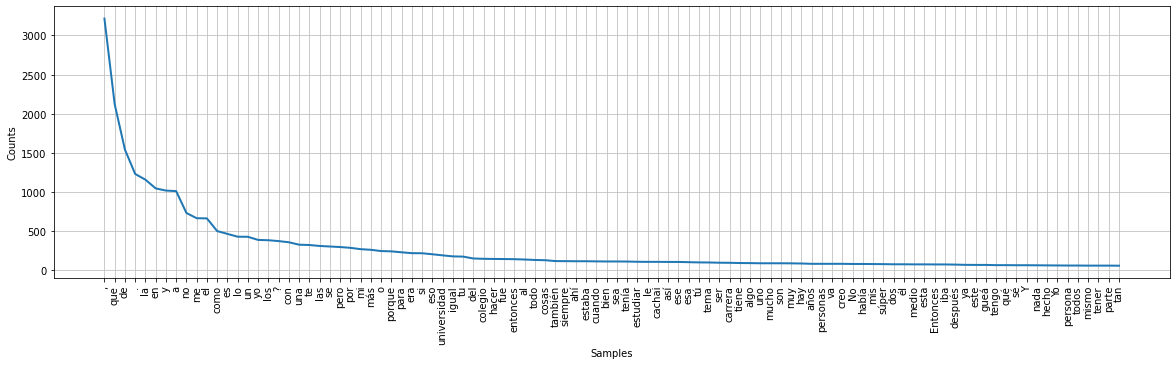

In [18]:
plt.figure(figsize=(20, 5))
text.plot(100)

4. Crea un **Lexical Dispersion Plot** con las palabras `universidad`, `gusta`, `plata`, `viejos`, `colegio`, `amigos`, `carrera`.
(Sugerencia: utiliza el método `dispersion_plot` disponible en el objeto Text creado previamente)

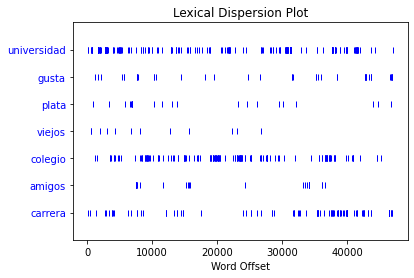

In [30]:
text.dispersion_plot(["universidad","gusta","plata","viejos","colegio","amigos","carrera"])

5. Crea un texto generado aleatoriamente a partir de un modelo de lenguaje con el método `generate` disponible en el objeto Text creado previamente. 

In [31]:
text.generate()

Building ngram index...
me apaño caleta en querer estudiar para ayudar a alguien a hacer . ,
principalmente de mi liceo que tiene que arrastrar y hay que hacer
todo de mis primos me llevo a una organización y trabajamos un tiempo
juntos . dentro de tu carrera , dar una buena abogada quiero ayudar en
el fondo sabía que como yo tuve la profesional que tiene ciertas
características como decías tu manual o el niño que quiere ser famosa
. adiología . tema de la universidad A . contexto de oportunidades que
se hace después de clase , durante o entre medio


'me apaño caleta en querer estudiar para ayudar a alguien a hacer . ,\nprincipalmente de mi liceo que tiene que arrastrar y hay que hacer\ntodo de mis primos me llevo a una organización y trabajamos un tiempo\njuntos . dentro de tu carrera , dar una buena abogada quiero ayudar en\nel fondo sabía que como yo tuve la profesional que tiene ciertas\ncaracterísticas como decías tu manual o el niño que quiere ser famosa\n. adiología . tema de la universidad A . contexto de oportunidades que\nse hace después de clase , durante o entre medio'

6. Ahora, realiza realiza estos mismos pasos (cálculo de diversidad léxica, plot, dispersion_plot y generate) con el entrevistado 2 y el entrevistado 5 por separado. ¿Encuentras alguna diferencia?

# Ejercicio 2: Análisis preliminar de hasthags en Twitter

Eres parte de una empresa consultora de Community Management. Parte de tu labor es reportar el "pulso" de la sociedad peruana (que habita Twitter) a partir del análisis de tweets.

Dada la coyuntura, se te pide que analices dos hasthags: `#CambioViciadoPorElLapiz` y `#CambioViciadoPorKeiko`



In [144]:
# Importa las librerías a utilizar
import tweepy
import re
from unicodedata import normalize
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download("stopwords")

# Variables con las credenciales de acceso al API de Twitter
consumerKey = "TYPE HERE"
consumerSecret = "TYPE HERE"
accessToken = "TYPE HERE"
accessTokenSecret = "TYPE HERE"

# Acceso al API de Twitter
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Extrae 2500 tweets que utilicen los hashtags mencionados y colócalos en dos listas separadas. 

In [ ]:
keyword_A = "#CambioViciadoPorElLapiz" # keyword or hashtag to search
keyword_B = "#CambioViciadoPorKeiko"
noOfTweet = 2500 # how many tweets to analyze

tweets_A = tweepy.Cursor(api.search, q=keyword_A, since = "2021-06-05", until = "2021-06-06").items(noOfTweet)
tweets_B = tweepy.Cursor(api.search, q=keyword_B, since = "2021-06-05", until = "2021-06-06").items(noOfTweet)

tweet_list_A = []
tweet_list_B = []
for tweet in tweets_A: tweet_list_A.append(tweet.text)
for tweet in tweets_B: tweet_list_B.append(tweet.text)

2. Crea dos Series de Pandas a partir de estas listas. Retira los duplicados y quita los caracteres indeseados. 

In [200]:
ser_A = pd.Series(data=tweet_list_A)
ser_A.drop_duplicates(keep=False, inplace=True)

ser_B = pd.Series(data=tweet_list_B)
ser_B.drop_duplicates(keep=False, inplace=True)

# Puedes usar estas funciones para remover los caracteres indeseados.
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
remove_tilde = lambda x: re.sub(
    	r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
    	normalize( "NFD", x), 0, re.I)
rt = lambda x:  re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)

new_serA = ser_A.map(remove_rt).map(remove_tilde).map(rt)
new_serA = new_serA.str.lower()

new_serB = ser_B.map(remove_rt).map(remove_tilde).map(rt)
new_serB = new_serB.str.lower()

3. Crea dos nubes de palabras con los tweets de cada hashtag. 

In [201]:
# Puedes usar esta función para crear las nubes de palabras
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    mystopwords = set(stopwords.words('spanish', 'english'))
    mystopwords.update(["cambioviciadoporkeiko","cambioviciadoporellapiz"]) 
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=mystopwords,
                  collocations=False)
    wc.generate(str(text))
    plt.figure(figsize=(40, 20))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

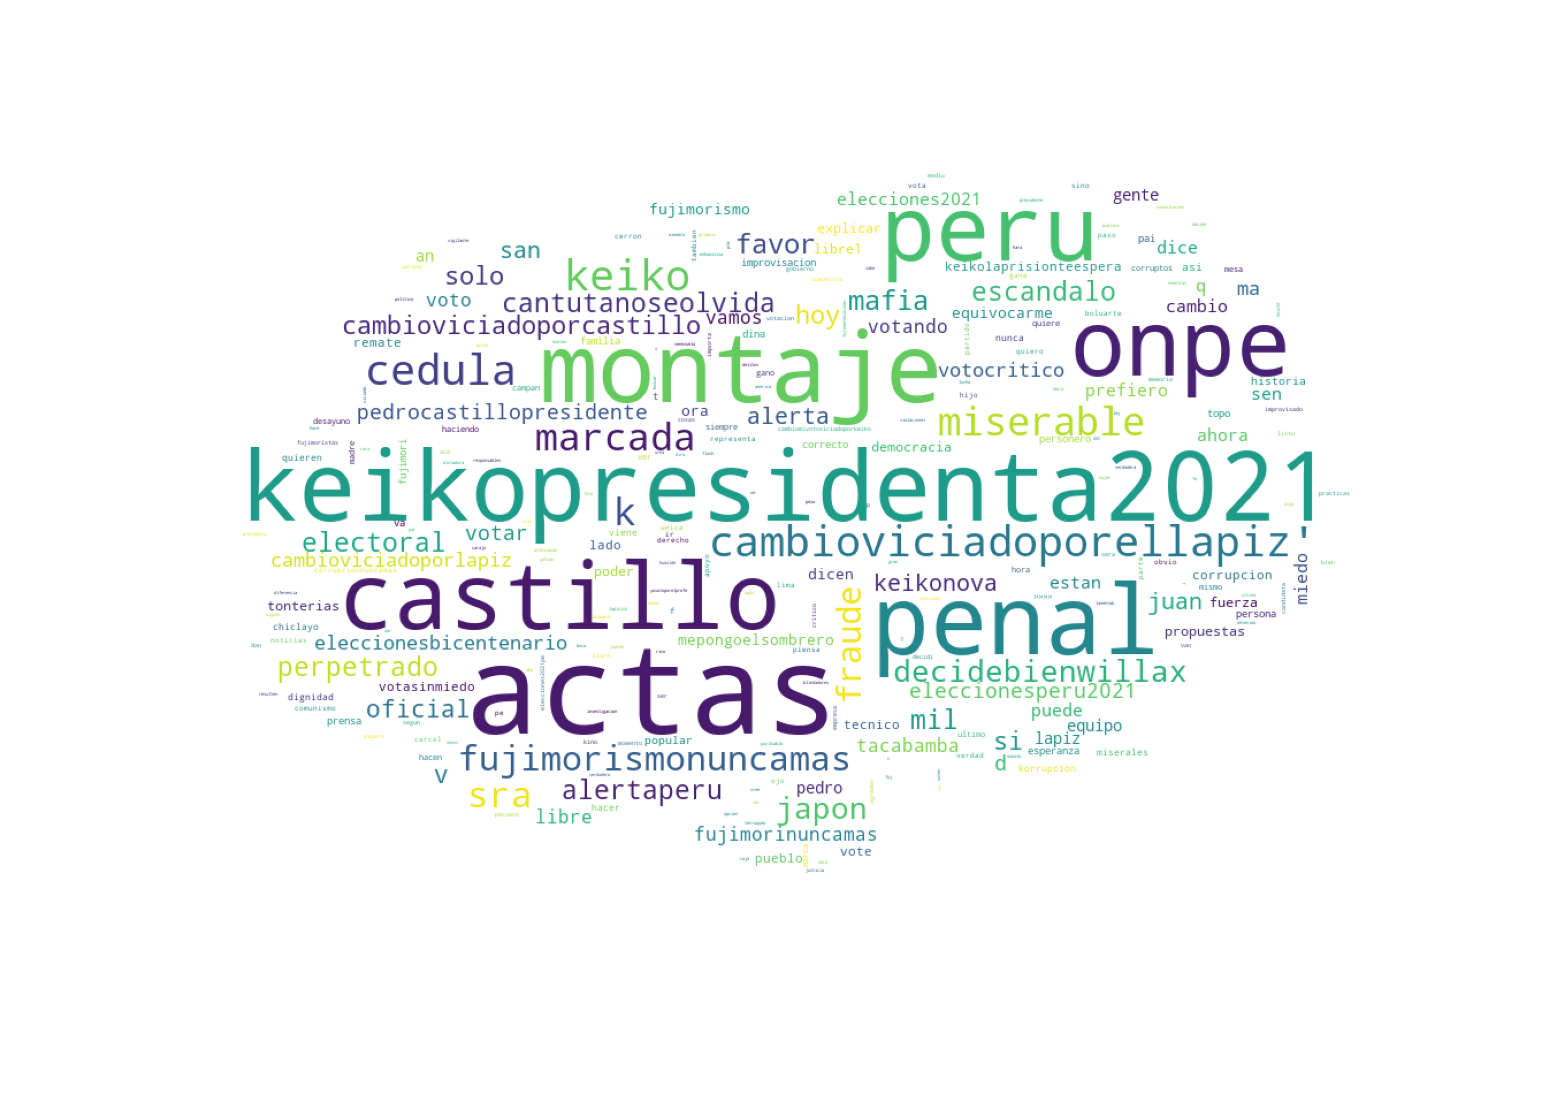

In [196]:
create_wordcloud(new_serA.values)

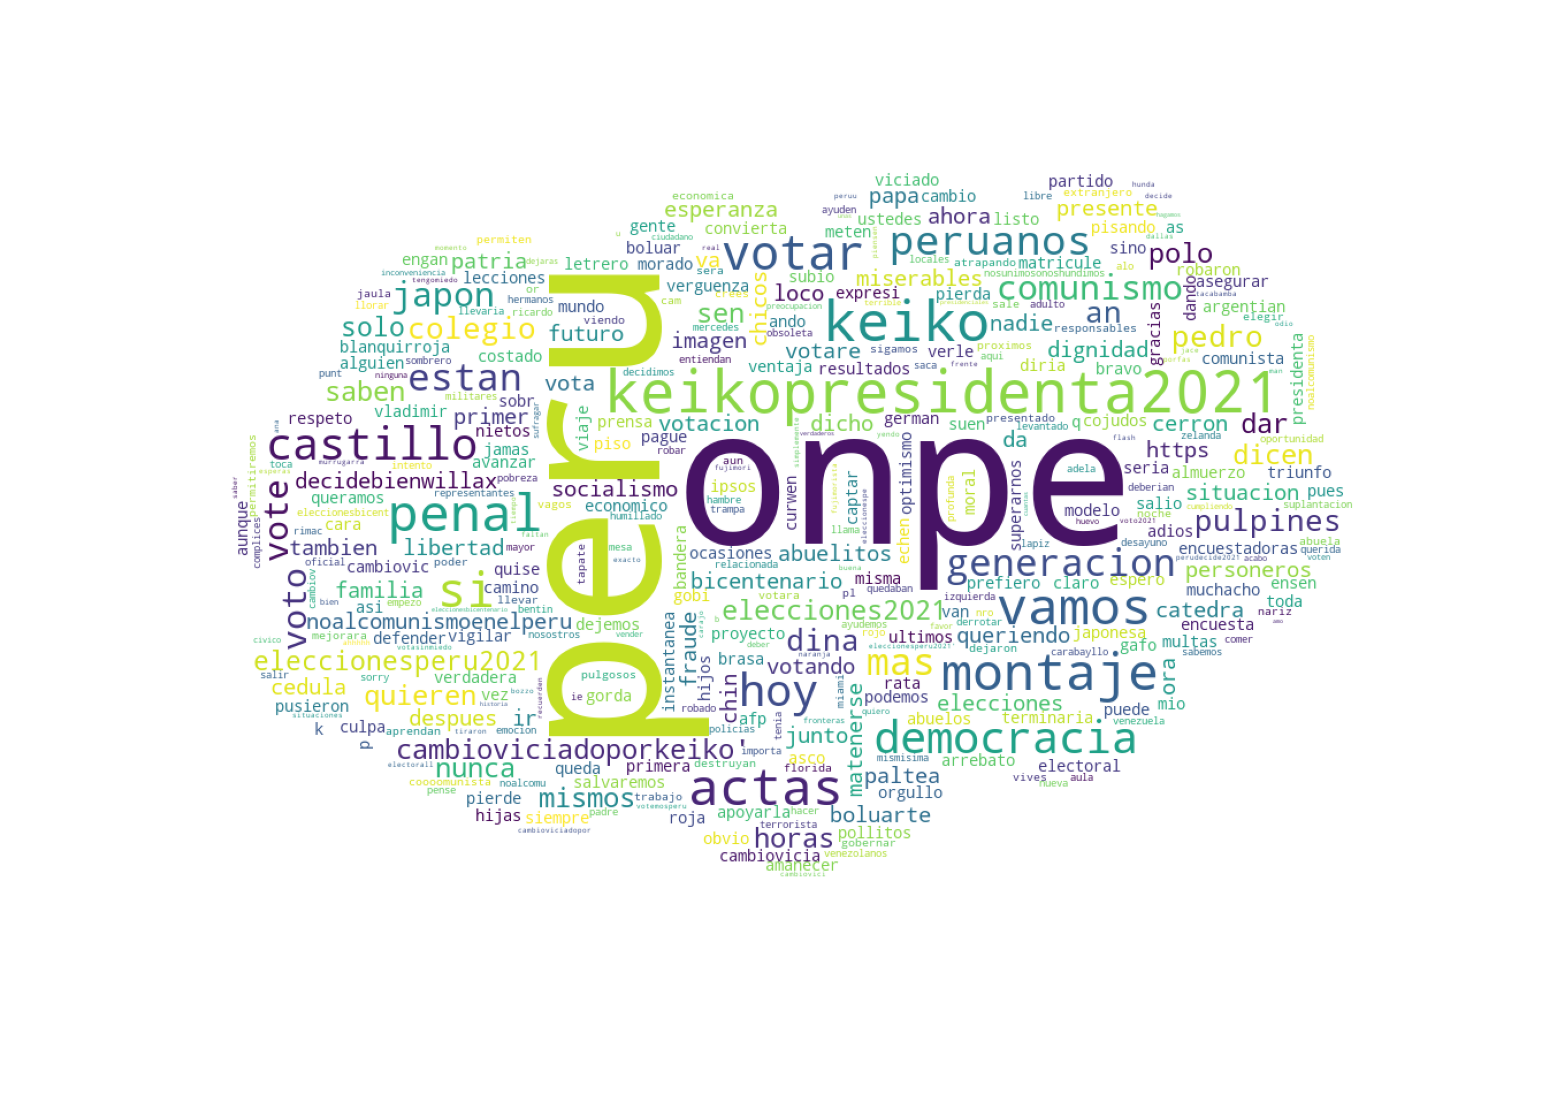

In [197]:
create_wordcloud(new_serB.values)

4. Crea un textos generados aleatoriamente a partir de un modelo de lenguaje de cada uno de los hashtags.

In [198]:
tokens_A = nltk.word_tokenize(' '.join(new_serA.values),language='spanish')
text_A = nltk.Text(tokens_A)
print(text_A.generate(50))

Building ngram index...
mil ced keiko es sinonimo de resguardarla de expedientes judiciales
creer mentiras de campan a pro no cambioviciadoporkeiko montaje de
actas keikopresidenta2021 del penal cambioviciadoporellapiz
cambioviciadoporellapiz cambioviciadoporellap cambioviciadoporellapiz
la prensa votasinmiedo cambioviciadoporellapiz cedulas marcadas a
favor de la sra k t cambioviciadoporellapiz la dinastia kim peruana
los fujimori y los
mil ced keiko es sinonimo de resguardarla de expedientes judiciales
creer mentiras de campan a pro no cambioviciadoporkeiko montaje de
actas keikopresidenta2021 del penal cambioviciadoporellapiz
cambioviciadoporellapiz cambioviciadoporellap cambioviciadoporellapiz
la prensa votasinmiedo cambioviciadoporellapiz cedulas marcadas a
favor de la sra k t cambioviciadoporellapiz la dinastia kim peruana
los fujimori y los


In [199]:
tokens_B = nltk.word_tokenize(' '.join(new_serB.values),language='spanish')
text_B = nltk.Text(tokens_B)
print(text_B.generate(50))

nueva zelanda keikopresidenta2021 japon noalcomunismo los hermanos
peruanos en japon le dicen no mi padre se ha levantado hoy y me ha
dicho con profunda preocupacion hoy votare por ti no por nadie mas no
dejaras la u cambioviciadoporkeiko cumpliendo con mi b no
cambioviciadoporkeiko montaje onpe actas keikopresidenta2021 del
nueva zelanda keikopresidenta2021 japon noalcomunismo los hermanos
peruanos en japon le dicen no mi padre se ha levantado hoy y me ha
dicho con profunda preocupacion hoy votare por ti no por nadie mas no
dejaras la u cambioviciadoporkeiko cumpliendo con mi b no
cambioviciadoporkeiko montaje onpe actas keikopresidenta2021 del
Building ngram index...
